In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/public-transport-delays-with-weather-and-events/public_transport_delays.csv


(2000, 24)
  trip_id        date      time transport_type  route_id origin_station  \
0  T00000  2023-01-01  05:00:00           Tram  Route_15     Station_31   
1  T00001  2023-01-01  05:15:00          Metro  Route_12     Station_49   
2  T00002  2023-01-01  05:30:00            Bus  Route_16     Station_29   
3  T00003  2023-01-01  05:45:00           Tram  Route_19     Station_26   
4  T00004  2023-01-01  06:00:00           Tram   Route_8     Station_18   

  destination_station scheduled_departure scheduled_arrival  \
0           Station_6            05:02:00          05:55:00   
1          Station_32            05:16:00          05:55:00   
2          Station_42            05:33:00          06:17:00   
3          Station_18            05:49:00          06:08:00   
4          Station_15            06:00:00          06:35:00   

   actual_departure_delay_min  ...  wind_speed_kmh precipitation_mm  \
0                          12  ...              46             13.0   
1                

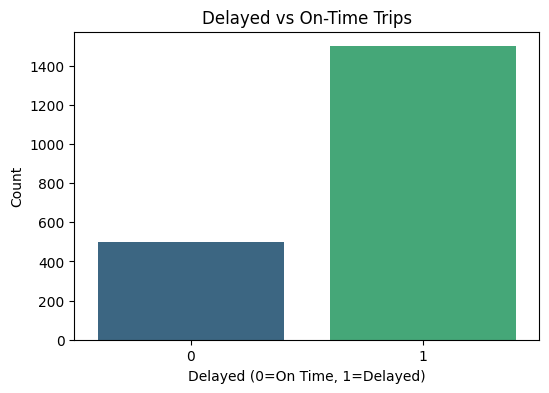

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


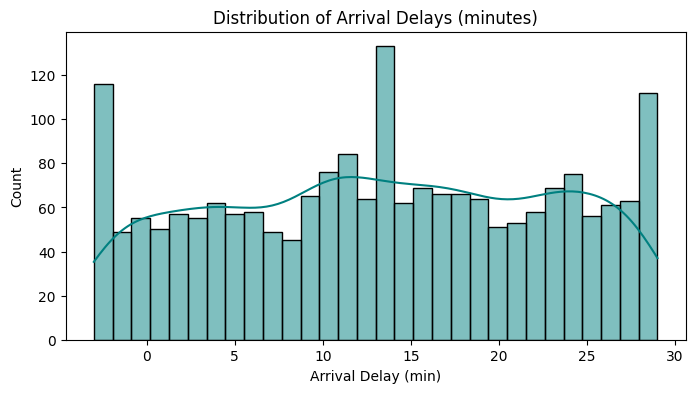

/tmp/ipykernel_13/2953454593.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="transport_type", y="actual_arrival_delay_min", palette="Set2", ci=None)


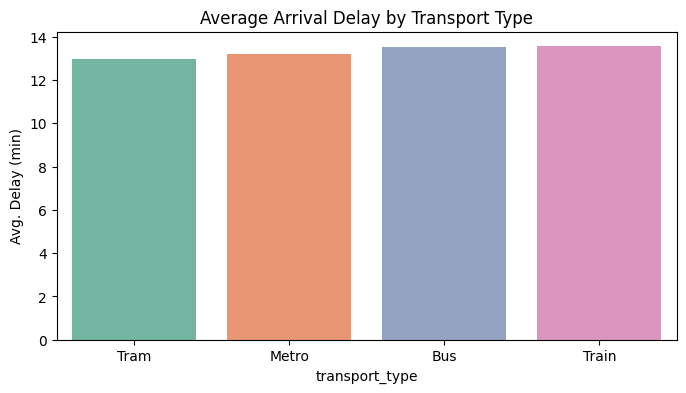

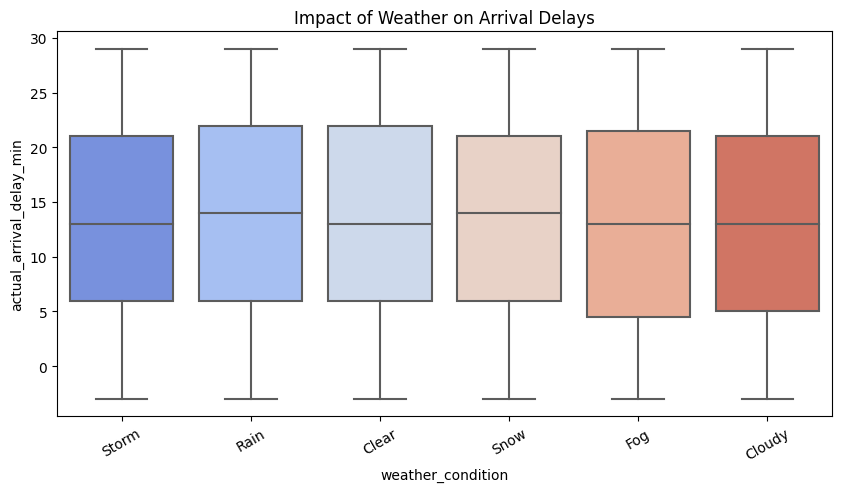

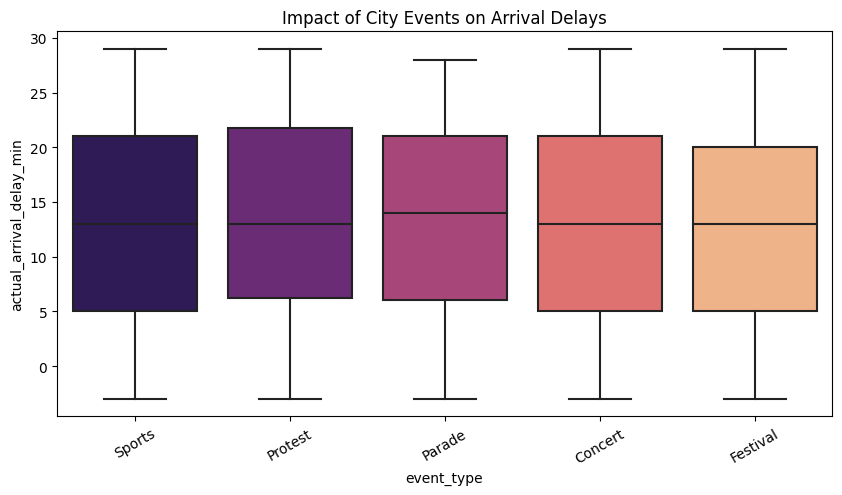

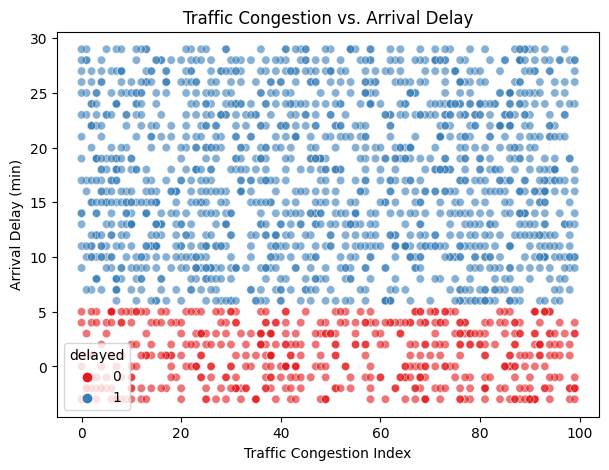

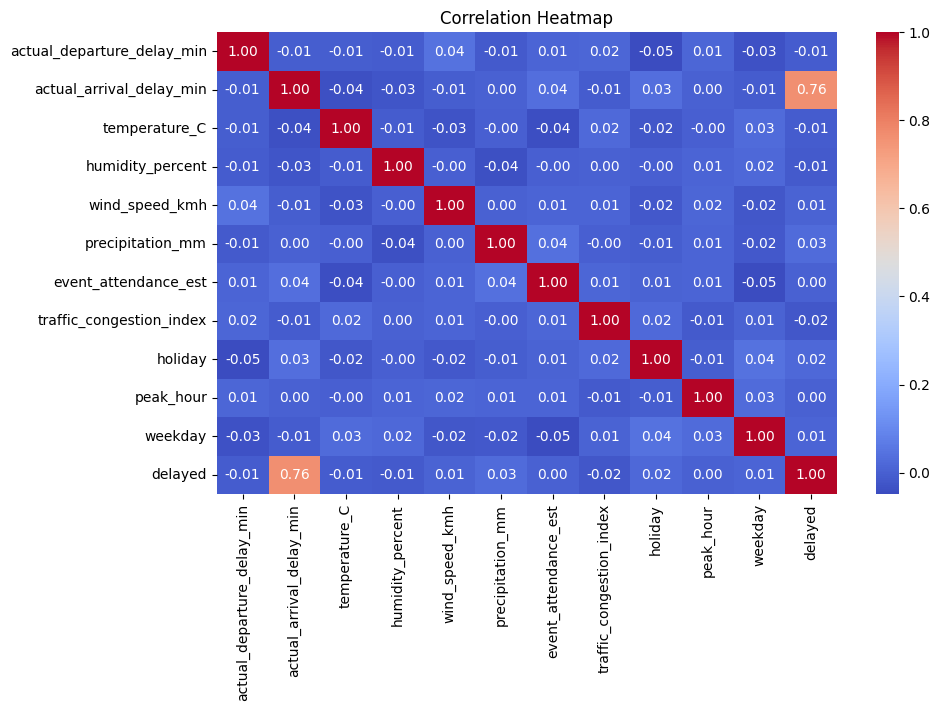

In [2]:
# 📊 Public Transport Delays - EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/public-transport-delays-with-weather-and-events/public_transport_delays.csv")

# Quick look at the data
print(df.shape)
print(df.head())

# ========== 1. Delay distribution ==========
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="delayed", palette="viridis")
plt.title("Delayed vs On-Time Trips")
plt.xlabel("Delayed (0=On Time, 1=Delayed)")
plt.ylabel("Count")
plt.show()

# ========== 2. Arrival delay histogram ==========
plt.figure(figsize=(8,4))
sns.histplot(df["actual_arrival_delay_min"], bins=30, kde=True, color="teal")
plt.title("Distribution of Arrival Delays (minutes)")
plt.xlabel("Arrival Delay (min)")
plt.show()

# ========== 3. Delays by Transport Type ==========
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="transport_type", y="actual_arrival_delay_min", palette="Set2", ci=None)
plt.title("Average Arrival Delay by Transport Type")
plt.ylabel("Avg. Delay (min)")
plt.show()

# ========== 4. Weather impact ==========
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="weather_condition", y="actual_arrival_delay_min", palette="coolwarm")
plt.title("Impact of Weather on Arrival Delays")
plt.xticks(rotation=30)
plt.show()

# ========== 5. Event impact ==========
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="event_type", y="actual_arrival_delay_min", palette="magma")
plt.title("Impact of City Events on Arrival Delays")
plt.xticks(rotation=30)
plt.show()

# ========== 6. Traffic congestion vs delay ==========
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="traffic_congestion_index", y="actual_arrival_delay_min", hue="delayed", palette="Set1", alpha=0.6)
plt.title("Traffic Congestion vs. Arrival Delay")
plt.xlabel("Traffic Congestion Index")
plt.ylabel("Arrival Delay (min)")
plt.show()

# ========== 7. Heatmap of correlations ==========
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
